# Special Pythagorean Triplet
A Pythagorean triplet is a set of three natural numbers, $a<b<c$, for which,

$$ a^2 + b^2 = c^2$$

There exists exactly one Pythagorean triplet for which $a+b+c=1000$. Find the product $abc$

## Solution One - Brute Force
The simplest solution is generating all possible triples that sum up to 1000 and testing if they are a Pythagorean triplet.

In [3]:
from typing import Tuple

from utils.timing import timed


@timed(10)
def solution_one(target: int = 1000) -> int:
    """
    finds a Pythagorean triplet that sums up to the target
    
    :param target: sum target
    """
    for c in range(1, target):

        for b in range(1, target - c):
            a: int = target - c - b

            if  a**2 + b**2 == c**2:
                return a * b * c

    return -1

answer, time = solution_one()
print(f'the answers if: {answer}')
print(f'that took: {time}s')

the answers if: 31875000
that took: 0.22048079419992064s


### Solution One Discussion
Because of the two nested loops solution one is really bad becoming quickly unsuable as the input grows. Moreover, this solution generates many invalid pythagorean  triplets which further slowing its performance. However in terms of memory it is pretty efficient creating only three variables.

## Solution Two - Using Euclid's Formula
Because we are just interested in Pythagorean triplets, we can use Euclid's Formula to generate only valid ones. Given $m,n$ where $m>n>0$ we can generate a valid triplet $a,b,c$ where $a<b<c$ the following way:

$$a = m^2 -n^2$$
$$b = 2mn$$
$$c = m^2 + n^2$$

With that, we know that the sum of a triplet is given by: 

$$\text{sum}=2(m^2 + mn)$$

And the product is given by:

$$\text{product}=(m^2-n^2) \cdot (2mn) \cdot (m^2+n^2)$$

In [4]:
from math import sqrt, floor

from utils.timing import timed


@timed(1)
def solution_two(target: int = 1000) -> int:
    """
    finds a Pythagorean triplet that sums up to the target
    
    :param target: sum target
    """
    for m in range(1, floor(sqrt(target / 2))):
        
        for n in range(1, m):

            if 2 * m**2 + 2*m*n == target:
                return (m**2 - n**2) * (2*m*n) * (m**2 + n**2)
    
    return -1
    

answer, time = solution_two()
print(f'the answers if: {answer}')
print(f'that took: {time}s')

the answers if: 31875000
that took: 7.32009998500871e-05s


### Solution Two Discussion
While solution two also has two nested loops, it offers a major improvement in performance compared to solution one because of the restricition on the maximum value of $m$. Rearranging, the sum formula derived above we know that:    

$$m < \sqrt{\frac{sum}{2}}, \text{since } n \geq 1$$

This severely reduces the amount of numbers we have to check. Moreover, Euclid's formula garantees that we will only get valid Pythagorean triplets, which means we don't have to test them, further improving solution two's performance.

## Plots

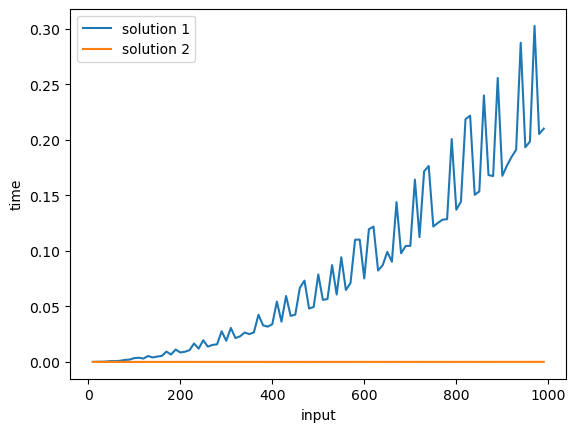

In [5]:
from utils.plotting import plot_range

params = tuple((i, ) for i in range(10, 1000, 10))
plot_range(params, (solution_one, solution_two))